<a href="https://colab.research.google.com/github/bongbong31/DL/blob/main/8_16_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0816 Weather Prediction

The dataset contains intuitively accessible weather observations from 18 locations in Europe.

It was designed to be suitable for a large variety of different training goals, many of which are not easily giving way to unrealistically high prediction accuracy.

Teachers or instructors thus can chose the difficulty of the training goals and thereby match it with the respective learner audience or lesson objective.

### libraries

In [26]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
df = pd.read_csv('/content/weather_prediction_dataset.csv')
df_bbq = pd.read_csv('/content/weather_prediction_bbq_labels.csv')

In [28]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [29]:
df_bbq.head()

,DATE,BASEL_BBQ_weather,BUDAPEST_BBQ_weather,DE_BBQ_weather,DRESDEN_BBQ_weather,DUSSELDORF_BBQ_weather,HEATHROW_BBQ_weather,KASSEL_BBQ_weather,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20000102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,20000103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20000104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,20000105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Dresden 지역 위주

In [31]:
# 특정 컬럼들을 확인 후 추출

# 반드시 있어야하는 컬럼
required_columns = ['DATE', 'DRESDEN_cloud_cover', 'DRESDEN_wind_speed', 'DRESDEN_wind_gust',
                    'DRESDEN_humidity', 'DRESDEN_global_radiation', 'DRESDEN_precipitation',
                    'DRESDEN_sunshine', 'DRESDEN_temp_mean', 'DRESDEN_temp_min',
                    'DRESDEN_temp_max']

# required_columns에 있는 컬럼 중 실제 df에 없는 컬럼들을 리스트
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f'Columns missing from DataFrame : {missing_columns}')
else:
    df_Dresden = df[required_columns]

In [32]:
df_Dresden['BBQ'] = df_bbq['DRESDEN_BBQ_weather']

<ipython-input-32-e769b1189c40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Dresden['BBQ'] = df_bbq['DRESDEN_BBQ_weather']


In [33]:
df_Dresden.head()

,DATE,DRESDEN_cloud_cover,DRESDEN_wind_speed,DRESDEN_wind_gust,DRESDEN_humidity,DRESDEN_global_radiation,DRESDEN_precipitation,DRESDEN_sunshine,DRESDEN_temp_mean,DRESDEN_temp_min,DRESDEN_temp_max,BBQ
0,20000101,8,3.2,7.2,0.89,0.09,0.32,0.0,1.0,-1.8,2.0,False
1,20000102,7,4.0,8.8,0.89,0.23,0.00,0.4,2.5,1.4,4.0,False
2,20000103,7,5.4,12.1,0.79,0.18,0.00,0.0,4.2,1.3,5.1,False
3,20000104,8,6.0,14.4,0.88,0.11,0.22,0.0,4.4,3.4,5.2,False
4,20000105,2,5.6,15.8,0.76,0.49,0.00,5.7,1.8,-0.5,6.9,False


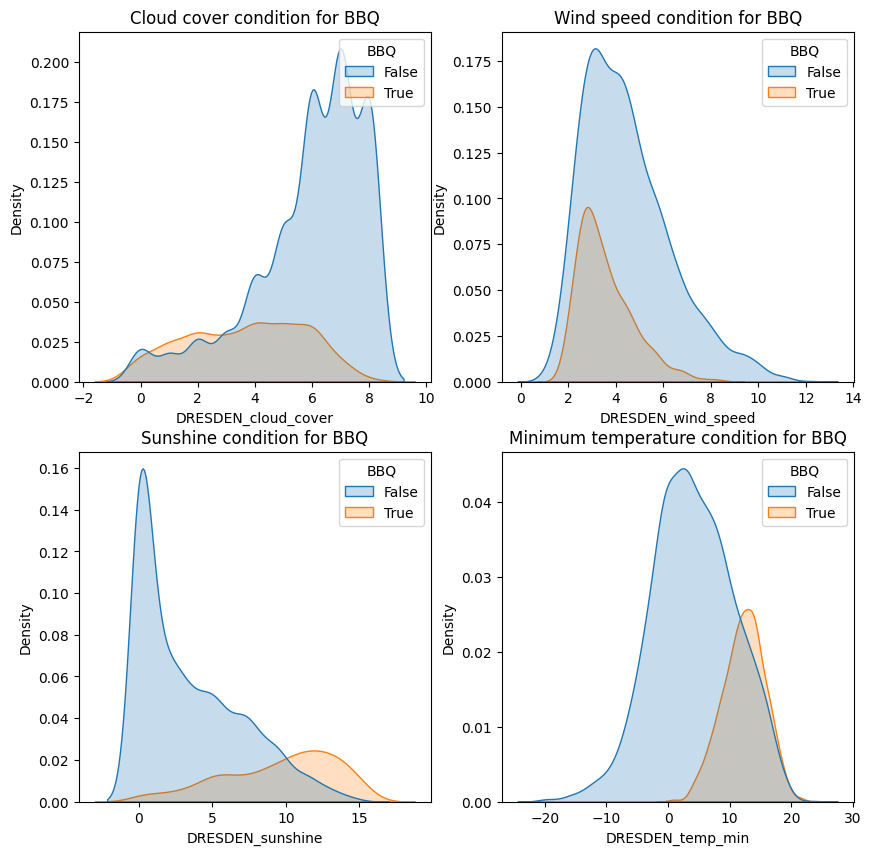

In [34]:
# 시각

fig, axs = plt.subplots(2,2, figsize=(10,10))

# kdeplot : 커널 밀도 추정 플롯 함수
# fill -> 곡선 아래 영역 채우기
sns.kdeplot(data=df_Dresden, x='DRESDEN_cloud_cover', hue='BBQ', fill=True, ax=axs[0,0])
axs[0,0].set_title('Cloud cover condition for BBQ')

sns.kdeplot(data=df_Dresden, x='DRESDEN_wind_speed', hue='BBQ', fill=True, ax=axs[0,1])
axs[0,1].set_title('Wind speed condition for BBQ')

sns.kdeplot(data=df_Dresden, x='DRESDEN_sunshine', hue='BBQ', fill=True, ax=axs[1,0])
axs[1,0].set_title('Sunshine condition for BBQ')

sns.kdeplot(data=df_Dresden, x='DRESDEN_temp_min', hue='BBQ', fill=True, ax=axs[1,1])
axs[1,1].set_title('Minimum temperature condition for BBQ')

plt.show()

<ipython-input-35-5fd3b061b37d>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_Dresden, x='DRESDEN_precipitation', hue='BBQ', fill=True, ax=axs[1,0])


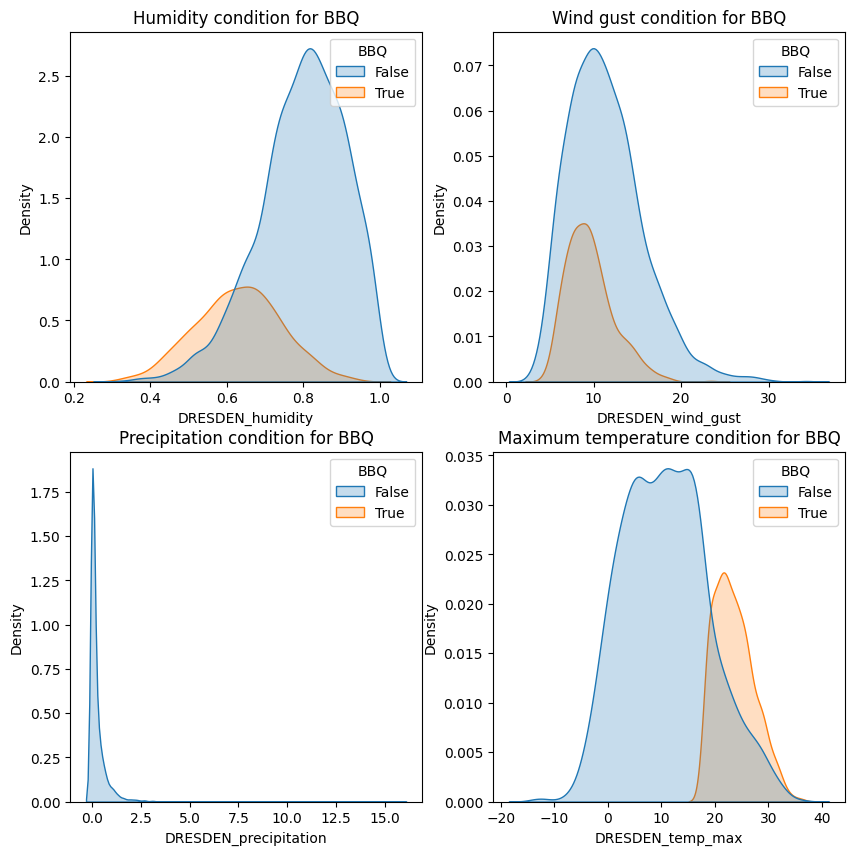

In [35]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

sns.kdeplot(data=df_Dresden, x='DRESDEN_humidity', hue='BBQ', fill=True, ax=axs[0,0])
axs[0,0].set_title('Humidity condition for BBQ')

sns.kdeplot(data=df_Dresden, x='DRESDEN_wind_gust', hue='BBQ', fill=True, ax=axs[0,1])
axs[0,1].set_title('Wind gust condition for BBQ')

sns.kdeplot(data=df_Dresden, x='DRESDEN_precipitation', hue='BBQ', fill=True, ax=axs[1,0])
axs[1,0].set_title('Precipitation condition for BBQ')

sns.kdeplot(data=df_Dresden, x='DRESDEN_temp_max', hue='BBQ', fill=True, ax=axs[1,1])
axs[1,1].set_title('Maximum temperature condition for BBQ')

plt.show()

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import graphviz
from sklearn.tree import export_graphviz

In [37]:
X = df_Dresden.drop(['DATE','BBQ'], axis=1)
y = df_Dresden['BBQ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=128)
len(X_train), len(X_test)

(2923, 731)

# ANN VS CNN

1) ANN(Artificial Neural Network, 인공신경망)
- 완전 연결층(FC layers)으로 구성
- 다양한 문제에 적용 가능한 범용성
- 주로 분류, 회귀, 패턴 인식 등에 사용

2) CNN(Convolutional Neural Network, 합성곱 신경망)
- 로컬 패턴 인식에 뛰어남
- 파라미터 공유로 효율적인 학습
- 주로 이미지 분류, 객체 탐지, 얼굴 인식 등

차이점
- ANN은 범용성이 높지만 큰 데이터 셋에서는 비효율적일 수 있음
- CNN은 이미지와 같은 격자 구조 데이터에 매우 효율적이지만, 다른 유형의 데이터에서는 덜 적합할 수 있음





### ANN model

In [94]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Conv1D, Flatten, Reshape, MaxPooling2D, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test :', X_test .shape)
print('y_test :', y_test.shape)

X_train : (2923, 10)
y_train : (2923,)
X_test : (731, 10)
y_test : (731,)


In [42]:
model = Sequential()
model.add(Dense(X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(int(X_train.shape[1]/2), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
model.fit(x=X_train,
          y=y_train,
          epochs=150,
          validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5659 - loss: 0.9140 - val_accuracy: 0.8810 - val_loss: 0.3343
Epoch 2/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8797 - loss: 0.3294 - val_accuracy: 0.8865 - val_loss: 0.2739
Epoch 3/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8855 - loss: 0.2697 - val_accuracy: 0.8892 - val_loss: 0.2541
Epoch 4/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8813 - loss: 0.2725 - val_accuracy: 0.8865 - val_loss: 0.2471
Epoch 5/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8918 - loss: 0.2475 - val_accuracy: 0.8892 - val_loss: 0.2442
Epoch 6/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8940 - loss: 0.2512 - val_accuracy: 0.8892 - val_loss: 0.2373
Epoch 7/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8999 - loss: 0.2299 - val_accuracy: 0.8892 - val_loss: 0.2330
Epoch 8/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8956 - loss: 0.2363 - val_accuracy: 0.8865 - v

<Axes: >

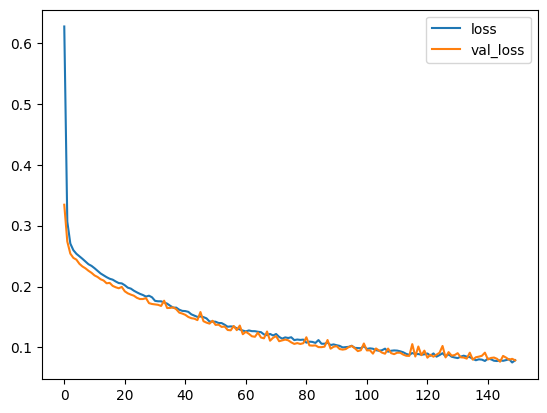

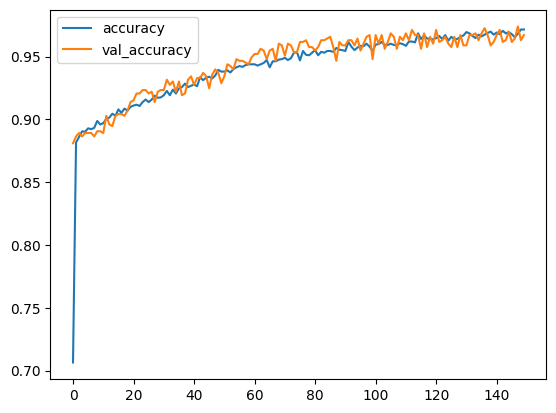

In [45]:
# 시각화

model_loss_acc = pd.DataFrame(model.history.history)
model_loss_acc[['loss', 'val_loss']].plot()
model_loss_acc[['accuracy', 'val_accuracy']].plot()

In [46]:
predictions = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [47]:
predictions = (predictions >0.5).astype(int)

In [48]:
ann_acc = accuracy_score(y_test, predictions)
print('Accuracy :', ann_acc)

Accuracy : 0.9671682626538988


Text(0.5, 1.0, 'Confusion Matrix for Predicting BBQ weather using ANN')

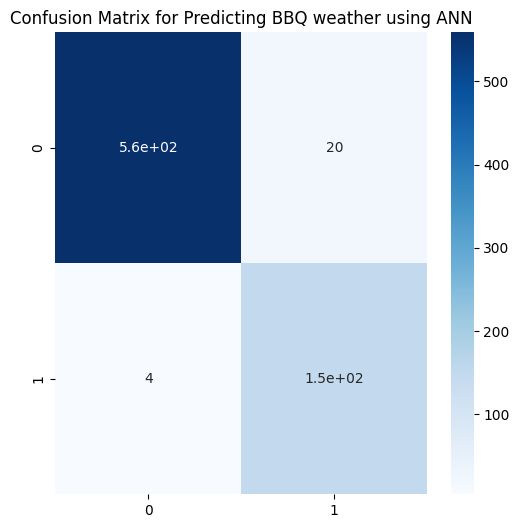

In [49]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='Blues')
plt.title('Confusion Matrix for Predicting BBQ weather using ANN')

### CNN model

In [50]:
print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test :', X_test .shape)
print('y_test :', y_test.shape)

X_train : (2923, 10)
y_train : (2923,)
X_test : (731, 10)
y_test : (731,)


In [51]:
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, 10, 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, 10, 1))

다르게 표현
```python
from tensorflow.keras.layers import Reshape
model.add(Reshape((1, 10, 1), input_shape=(10,)))
```

데이터의 형태를 변경하는 과정 \
- 이런 변환은 일반적으로 시계열 데이터나 1차원 신호 데이터를 CNN에 적용할때 사용
- 날씨 데이터의 여러 특성을 시간에 따라 1D CNN분석하려고 형태를 변환


In [56]:
model2 = Sequential()
model2.add(Conv2D(filters=16, kernel_size=(1,2), activation='relu', input_shape=(1,10,1)))
model2.add(MaxPooling2D(pool_size=(1,2)))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Q) 커널 사이즈 (1,2) 괜찮은가?

A) 우리가 배운건 늘 (3,3) 같은 정방향 커널만 사용했음. \
근데 입력 데이터의 형태가 (1, 10, 1)이므로 시계열 데이터의 연속된 두 시점을 한 번에 고려하기위해 직사각형 커널을 사용함

장점
- 시간적 관계 포착 : 연속된 두 시점 간의 관계를 잡아낼 수 있음
- 계산 효율성 : 정사각형 커널보다 파라미터 수가 적어 계산이 효율적
- (1,3) 이나 (1,4) 등의 커널로 더 긴 시간의 범위 관계를 고려할 수 있음

In [60]:
model2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [58]:
model2.fit(x=X_train_reshaped,
           y=y_train,
           epochs=150,
           validation_data=(X_test_reshaped, y_test),
           verbose=1)

Epoch 1/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7858 - loss: 0.4302 - val_accuracy: 0.8933 - val_loss: 0.2424
Epoch 2/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8874 - loss: 0.2520 - val_accuracy: 0.8919 - val_loss: 0.2240
Epoch 3/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8976 - loss: 0.2408 - val_accuracy: 0.8837 - val_loss: 0.2241
Epoch 4/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9053 - loss: 0.2171 - val_accuracy: 0.9070 - val_loss: 0.2036
Epoch 5/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8982 - loss: 0.2245 - val_accuracy: 0.9152 - val_loss: 0.1936
Epoch 6/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9078 - loss: 0.2020 - val_accuracy: 0.9220 - val_loss: 0.1844
Epoch 7/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9072 - loss: 0.1995 - val_accuracy: 0.9248 - val_loss: 0.1698
Epoch 8/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9122 - loss: 0.1839 - val_accuracy: 0.9316 - 

<Axes: >

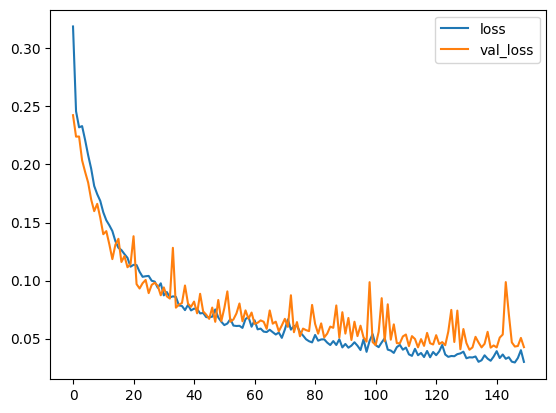

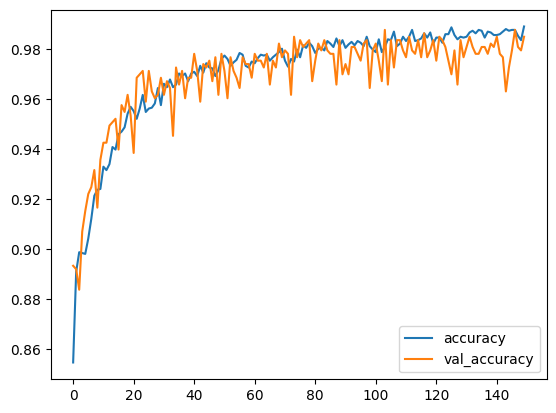

In [59]:
model2_loss_acc = pd.DataFrame(model2.history.history)
model2_loss_acc[['loss', 'val_loss']].plot()
model2_loss_acc[['accuracy', 'val_accuracy']].plot()

약간 overfitting 느낌 \
-> model2에 Dropout 적용해보기 (model3로 나타내기)

In [64]:
model3 = Sequential()
model3.add(Conv2D(filters=16, kernel_size=(1,2), activation='relu', input_shape=(1,10,1)))
model3.add(MaxPooling2D(pool_size=(1,2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model3.compile(optimizer='adam',
               loss='crossentropy',
               metrics=['accuracy'])

In [66]:
model3.fit(x=X_train_reshaped, y=y_train, epochs=150, validation_data=(X_test_reshaped, y_test))

Epoch 1/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8431 - loss: 0.3720 - val_accuracy: 0.8618 - val_loss: 0.3335
Epoch 2/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8849 - loss: 0.2579 - val_accuracy: 0.8919 - val_loss: 0.2370
Epoch 3/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9032 - loss: 0.2218 - val_accuracy: 0.9111 - val_loss: 0.2284
Epoch 4/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8979 - loss: 0.2316 - val_accuracy: 0.9083 - val_loss: 0.1992
Epoch 5/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8998 - loss: 0.2170 - val_accuracy: 0.9220 - val_loss: 0.1956
Epoch 6/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9055 - loss: 0.2061 - val_accuracy: 0.9193 - val_loss: 0.1800
Epoch 7/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9077 - loss: 0.2054 - val_accuracy: 0.9166 - val_loss: 0.1728
Epoch 8/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9071 - loss: 0.1987 - val_accuracy: 0.9261 - 

<Axes: >

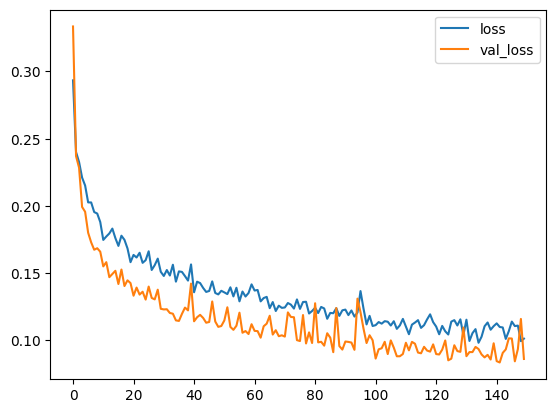

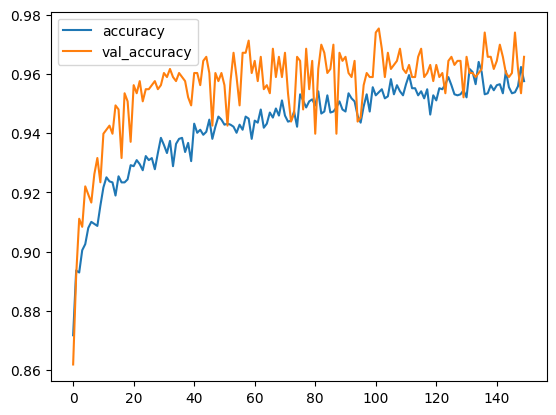

In [67]:
model3_loss_acc = pd.DataFrame(model3.history.history)
model3_loss_acc[['loss', 'val_loss']].plot()
model3_loss_acc[['accuracy', 'val_accuracy']].plot()

epochs 40 이후에는 변화가 미미함 -> early stopping 사용하는 것도 좋을듯

# 모델 3개 비교하기

In [77]:
history1 = model.fit(x=X_train, y=y_train, epochs=150, validation_data=(X_test, y_test))
history2 = model2.fit(x=X_train_reshaped, y=y_train, epochs=150, validation_data=(X_test_reshaped, y_test))
history3 = model3.fit(x=X_train_reshaped, y=y_train, epochs=150, validation_data=(X_test_reshaped, y_test))

Epoch 1/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9683 - loss: 0.0825 - val_accuracy: 0.9699 - val_loss: 0.0774
Epoch 2/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9677 - loss: 0.0782 - val_accuracy: 0.9658 - val_loss: 0.0829
Epoch 3/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9704 - loss: 0.0759 - val_accuracy: 0.9617 - val_loss: 0.0867
Epoch 4/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9706 - loss: 0.0759 - val_accuracy: 0.9562 - val_loss: 0.1156
Epoch 5/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9639 - loss: 0.0917 - val_accuracy: 0.9726 - val_loss: 0.0751
Epoch 6/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9798 - loss: 0.0599 - val_accuracy: 0.9699 - val_loss: 0.0748
Epoch 7/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9762 - loss: 0.0648 - val_accuracy: 0.9631 - val_loss: 0.0836
Epoch 8/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9718 - loss: 0.0711 - val_accuracy: 0.9754 - 

In [84]:
def plot_training_history(histories, labels):
    fig, axes = plt.subplots(3, 2, figsize=(15, 20))

    # 각 모델의 개별 그래프
    for i, (history, label) in enumerate(zip(histories, labels)):
        # 손실 그래프
        axes[i, 0].plot(history.history['loss'], label='Training Loss')
        axes[i, 0].plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
        axes[i, 0].set_title(f'{label} - Loss')
        axes[i, 0].set_xlabel('Epoch')
        axes[i, 0].set_ylabel('Loss')
        axes[i, 0].legend()

        # 정확도 그래프
        axes[i, 1].plot(history.history['accuracy'], label='Training Accuracy')
        axes[i, 1].plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
        axes[i, 1].set_title(f'{label} - Accuracy')
        axes[i, 1].set_xlabel('Epoch')
        axes[i, 1].set_ylabel('Accuracy')
        axes[i, 1].legend()

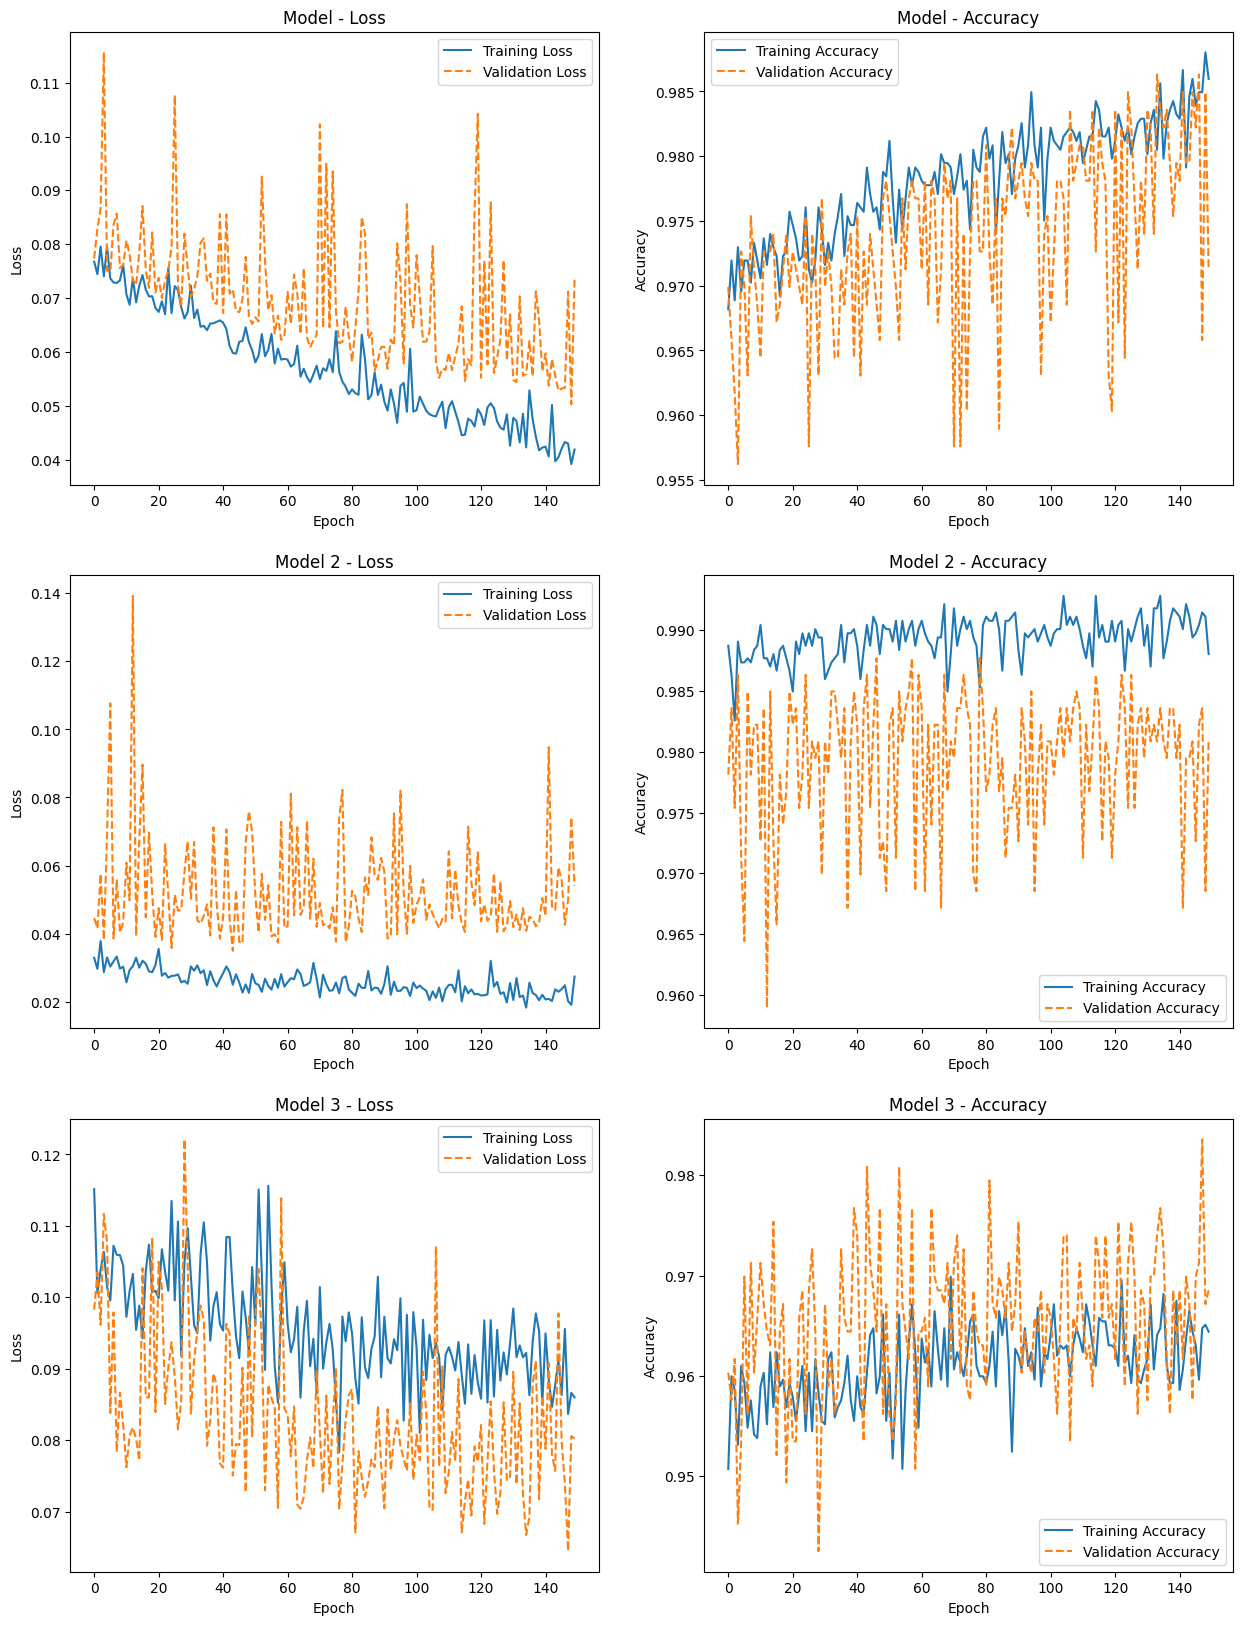

In [85]:
histories = [history1, history2, history3]
labels = ['Model', 'Model 2', 'Model 3']

plot_training_history(histories, labels)

앞선 그래프들은 data frame으로 저장 후 플롯을 표현한 것 \
위의 6개의 subplot 그래프틀은 history로 변수명 주고 바로 플롯해서 좀 더 많은 상세한 정보 제공함. \
model3가 가장 효율이 좋은거 같음 \
-> 오히려 데이터셋이 작기에 언더피팅이 발생한 것 같음.. \
-> learning rate를 추가해서 좀 더 모델의 안정성을 추가해보겠음

In [104]:
# 레이어를 더 추가해줌
# shape가 매우 작기에 padding도 추가해줌
model4 = Sequential([
    Conv2D(16, kernel_size=(1,2), activation='relu', padding='same', input_shape=(1,10,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(1, 2), strides=(1, 2)),

    Conv2D(64, kernel_size=(1,2), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(1, 2), strides=(1, 2)),

    Conv2D(128, kernel_size=(1,2), activation='relu', padding='same'),
    BatchNormalization(),
    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

In [105]:
model4.compile(optimizer=Adam(learning_rate=0.001),
               loss='crossentropy',
               metrics=['accuracy'])

In [106]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

history4 = model4.fit(x=X_train_reshaped,
                      y=y_train,
                      epochs=100,
                      validation_data=(X_test_reshaped, y_test),
                      verbose=1,
                      callbacks=[early_stopping])

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7816 - loss: 0.5121 - val_accuracy: 0.8181 - val_loss: 0.4405
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8999 - loss: 0.2916 - val_accuracy: 0.7948 - val_loss: 0.4192
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8981 - loss: 0.2752 - val_accuracy: 0.8550 - val_loss: 0.2752
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9107 - loss: 0.2404 - val_accuracy: 0.9193 - val_loss: 0.2060
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9089 - loss: 0.2122 - val_accuracy: 0.7921 - val_loss: 0.5467
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9152 - loss: 0.1924 - val_accuracy: 0.8933 - val_loss: 0.2053
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9229 - loss: 0.1833 - val_accuracy: 0.7934 - val_loss: 0.3737
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9155 - loss: 0.1982 - val_accuracy: 0.7921 - 

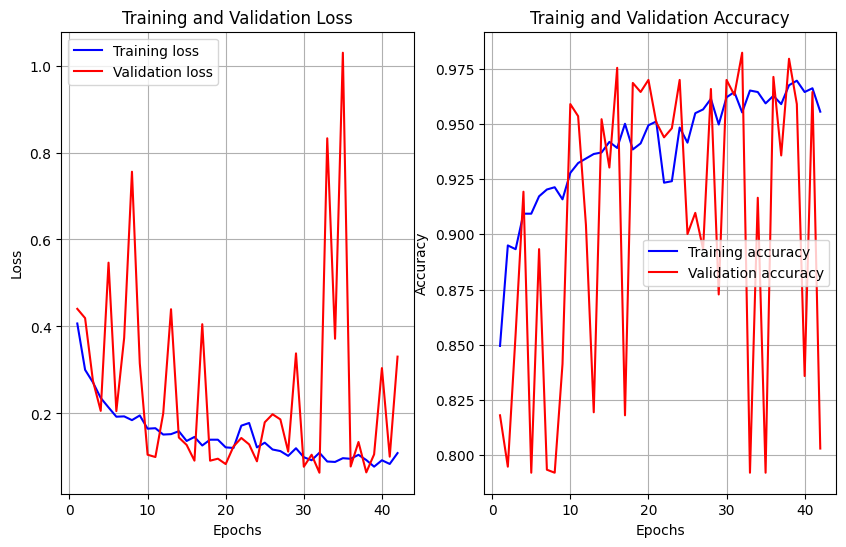

In [108]:
# 시각화
# 다음엔 이걸 함수로 만드는게 더 효율적일듯..ㅜㅜ
history4_dict = history4.history

loss = history4_dict['loss']
val_loss = history4_dict['val_loss']

accuracy = history4_dict['accuracy']
val_accuracy = history4_dict['val_accuracy']

epochs = range(1, len(loss)+1)

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, 'b', label='Training loss')
ax1.plot(epochs, val_loss, 'r', label='Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, accuracy, 'b', label='Training accuracy')
ax2.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
ax2.set_title('Trainig and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid()

plt.show()

overfitting!! \
어디서 잘못된거지....

-> 다음 스터디 이걸 개선해보기...ㅜㅜ